In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import kagglehub
import os

In [2]:
# Download dataset
path = kagglehub.dataset_download("lihxlhx/give-me-some-credit")

print("Path to dataset files:", path)

100%|██████████| 5.16M/5.16M [00:00<00:00, 59.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lihxlhx/give-me-some-credit/versions/1


In [3]:
# Verify dataset download
print("Dataset path:", path)
print("Files:", os.listdir(path))  # List all files in the downloaded director

Dataset path: /root/.cache/kagglehub/datasets/lihxlhx/give-me-some-credit/versions/1
Files: ['cs-test.csv', 'Data Dictionary.xls', 'sampleEntry.csv', 'cs-training.csv']


In [4]:
# Load dataset into pandas DataFrame
csv_file = os.path.join(path, "cs-training.csv")

data = pd.read_csv(csv_file) # Read the dataset
print(data.head()) # Display the first few rows of the dataset

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

In [5]:
# Display column names
print("Column Names:", data.columns.tolist())

Column Names: ['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [6]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

# Show dataset info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
# Check for missing values in the dataset
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [8]:
# Handle missing values
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

In [10]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define target and features
X = data.drop(columns=['SeriousDlqin2yrs'])  # Features (all except target)
y = data['SeriousDlqin2yrs']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (120000, 10)
Testing Set Shape: (30000, 10)


In [12]:
# Creating Debt-to-Income Ratio feature
X_train['DebtToIncomeRatio'] = X_train['DebtRatio'] / (X_train['MonthlyIncome'] + 1)
X_test['DebtToIncomeRatio'] = X_test['DebtRatio'] / (X_test['MonthlyIncome'] + 1)


In [13]:
# Initialize the Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight="balanced_subsample",  # Dynamic class balancing
    random_state=42,
    n_jobs=-1
)

# Train the model on the training data
rf_model.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


In [14]:
# Make predictions using the trained model
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Generate a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[25128  2867]
 [  789  1216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     27995
           1       0.30      0.61      0.40      2005

    accuracy                           0.88     30000
   macro avg       0.63      0.75      0.67     30000
weighted avg       0.92      0.88      0.90     30000



<ipython-input-16-8f6a1192cec7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="viridis")


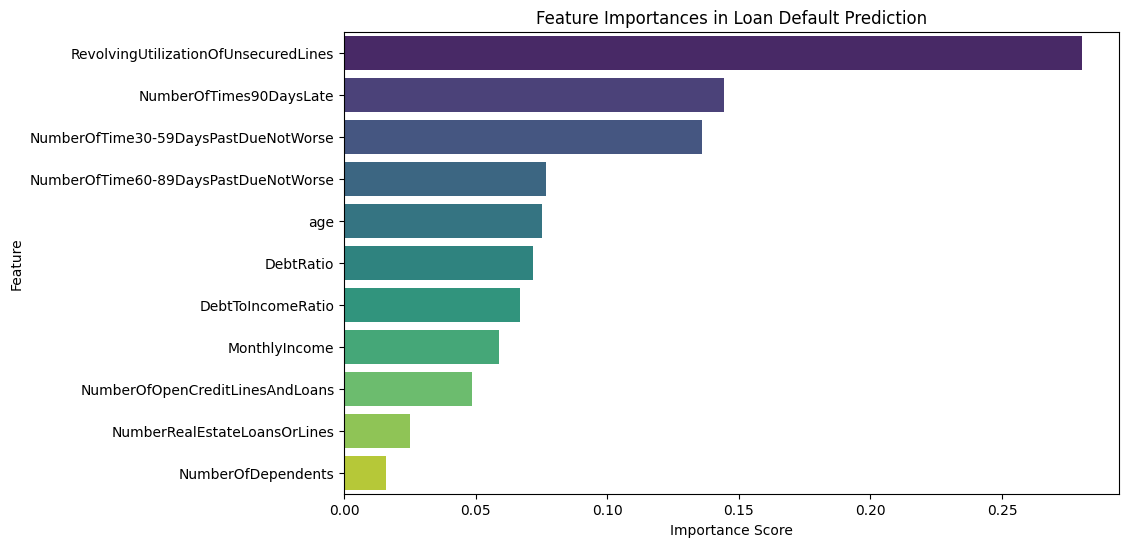

In [16]:
# Visualization of the model

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort importances from trained model
importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="viridis")
plt.title("Feature Importances in Loan Default Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


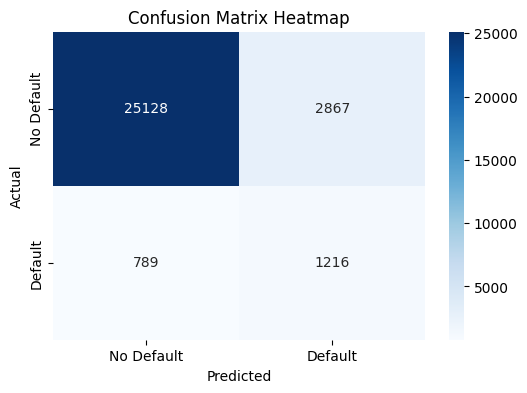

In [20]:
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


<ipython-input-23-dfa37cc8ff9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=["#1f77b4", "#ff7f0e"])


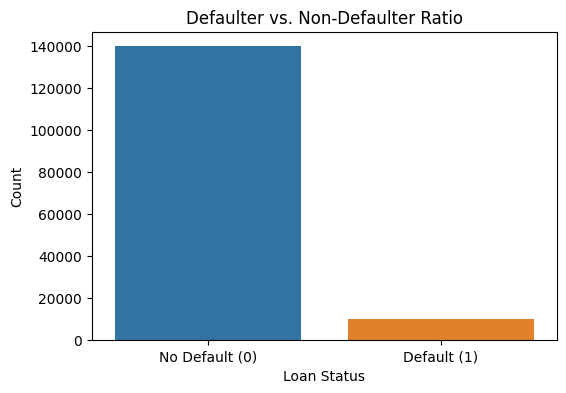

In [23]:
# Count of defaulters and non-defaulters
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette=["#1f77b4", "#ff7f0e"])
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.title("Defaulter vs. Non-Defaulter Ratio")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


In [26]:
# Risk Score Calculation
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Define thresholds for risk levels
high_risk_dti = 0.4  # 40% Debt-to-Income ratio
high_risk_credit_usage = 0.9  # 90% or more revolving credit utilization
late_payment_threshold = 3  # More than 3 late payments

# Create a DataFrame for insights
insights = pd.DataFrame()

# 1. Identify high-risk borrowers based on Debt-to-Income Ratio
insights["High Debt-to-Income"] = (X_test["DebtRatio"] > high_risk_dti)

# 2. Identify high-risk borrowers based on high credit usage
insights["High Credit Utilization"] = (X_test["RevolvingUtilizationOfUnsecuredLines"] > high_risk_credit_usage)

# 3. Identify borrowers with multiple late payments
insights["Frequent Late Payments"] = (X_test["NumberOfTime30-59DaysPastDueNotWorse"] > late_payment_threshold) | \
                                     (X_test["NumberOfTimes90DaysLate"] > late_payment_threshold) | \
                                     (X_test["NumberOfTime60-89DaysPastDueNotWorse"] > late_payment_threshold)

# Add predicted risk scores from model
insights["Risk Score"] = y_probs * 100  # Convert probabilities to percentage

# Display first few insights
print(insights.head(10))


        High Debt-to-Income  High Credit Utilization  Frequent Late Payments  \
10682                  True                    False                   False   
40173                  True                    False                   False   
4719                  False                    False                   False   
81730                  True                    False                   False   
113639                 True                    False                   False   
86739                  True                    False                   False   
30081                 False                    False                   False   
12131                 False                     True                    True   
57895                 False                    False                   False   
38809                  True                    False                   False   

        Risk Score  
10682     7.350963  
40173    10.248167  
4719      3.958208  
81730     9.326753  
113639   10.41